# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alekb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("news_api")
#newsapi = NewsApiClient(api_key='db8d090b01374f288c98249364c91ee0')

In [10]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [11]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="apple",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]



Total articles about Bitcoin: 37345


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Gear Team',
 'title': 'Everything Apple Announced Today: iPhones, iPads, Apple Watch',
 'description': 'The company unveiled the iPhone 13—and a handful of other products—at a media event Tuesday.',
 'url': 'https://www.wired.com/story/everything-apple-announced-september-2021/',
 'urlToImage': 'https://media.wired.com/photos/6140fc8b6ab67fe10ebfff7f/191:100/w_1280,c_limit/Gear-Apple_watch-series7_hero_09142021.jpg',
 'publishedAt': '2021-09-14T20:10:19Z',
 'content': 'Somehow its September already, which means its time for new iPhones. Today, as its done for the past year and a half, Apple streamed a virtual launch event from its spaceship headquarters in Cupertin… [+2763 chars]'}

In [12]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about ethereum: 2701


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Offchain Labs raises $120 million to hide Ethereum’s shortcomings with its Arbitrum product',
 'description': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized apps on the Ethereum blockchain. The popular network has see…',
 'url': 'http://techcrunch.com/2021/08/31/offchain-labs-raises-120-million-to-hide-ethereums-shortcomings-with-arbitrum-scaling-product/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/08/Image-from-iOS-5.jpg?w=533',
 'publishedAt': '2021-08-31T12:30:39Z',
 'content': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]'}

In [13]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.tail(5)

,date,text,compound,positive,negative,neutral
95,2021-08-20,NBC has shared the first trailer for Frogger. ...,0.4019,0.096,0.0,0.904
96,2021-09-07,While Apple's entry-level iPad is ideal for th...,0.8225,0.174,0.0,0.826
97,2021-09-14,After expanding to Samsung TVs\r\n earlier in ...,0.0000,0.000,0.0,1.000
98,2021-09-14,"Todays the day, folks. At long last, after mon...",0.2732,0.050,0.0,0.950
99,2021-08-30,Speakers are distributed in 3D space just like...,0.3612,0.068,0.0,0.932


In [14]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.000,0.833
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
3,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [15]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.00000,100.000000,100.000000,100.000000
mean,0.16080,0.067740,0.032240,0.900010
std,0.40386,0.063296,0.058561,0.080784
min,-0.89340,0.000000,0.000000,0.688000
25%,0.00000,0.000000,0.000000,0.837500
50%,0.11535,0.067000,0.000000,0.913000
75%,0.45880,0.103250,0.065250,0.960500
max,0.87480,0.210000,0.312000,1.000000


In [16]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.149105,0.067180,0.028900,0.903930
std,0.356424,0.069905,0.051101,0.085339
min,-0.893400,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.842000
50%,0.051600,0.057000,0.000000,0.913000
75%,0.421500,0.100000,0.056500,1.000000
max,0.941300,0.308000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re



In [65]:
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [71]:
# Instantiate the lemmatizer
def tokenizer(doc):
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ', '.join(output)

# Create a list of stopwords


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [73]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []
for i in range (0,100):
    try:
        doc=bitcoin_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            tokens = tokenizer(doc)
            bitcoin_tokens.append({"token": tokens })
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df_tokens = pd.DataFrame(bitcoin_tokens)                    
bitcoin_df_comb=pd.concat([bitcoin_df, bitcoin_df_tokens],axis="columns", join="inner")

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text", "token"]
bitcoin_df_comb = bitcoin_df_comb[cols]

bitcoin_df_comb.head()

,date,compound,positive,negative,neutral,text,token
0,2021-09-14,0.0000,0.000,0.0,1.000,"Somehow its September already, which means its...","somehow, september, already, mean, time, new, ..."
1,2021-08-23,0.7269,0.164,0.0,0.836,"For a few years now, wireless carriers in the ...","year, wireless, carrier, us, offered, customer..."
2,2021-08-30,0.0000,0.000,0.0,1.000,A standalone Apple Music classical app will be...,"standalone, apple, music, classical, app, rele..."
3,2021-09-14,0.0000,0.000,0.0,1.000,Apple Watch users who ride bikes will get a ha...,"apple, watch, user, ride, bike, get, handful, ..."
4,2021-09-13,0.0000,0.000,0.0,1.000,"Recently, Apple has essentially released a new...","recently, apple, ha, essentially, released, ne..."


In [72]:
# Create a new tokens column for Ethereum
ethereum_tokens = []
for i in range (0,100):
    try:
        doc=ethereum_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            tokens = tokenizer(doc)
            ethereum_tokens.append({"token": tokens })
    except AttributeError:
        pass

# Create DataFrame
ethereum_df_tokens = pd.DataFrame(ethereum_tokens)                    
ethereum_df_comb=pd.concat([ethereum_df, ethereum_df_tokens],axis="columns", join="inner")

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text", "token"]
ethereum_df_comb = ethereum_df_comb[cols]

ethereum_df_comb.head()

,date,compound,positive,negative,neutral,text,token
0,2021-08-31,0.7351,0.167,0.000,0.833,As the broader crypto world enjoys a late summ...,"broader, crypto, world, enjoys, late, summer, ..."
1,2021-09-16,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...,"wont, stick, bitcoin, youre, determined, pay, ..."
2,2021-08-23,0.4215,0.098,0.000,0.902,PayPal will now allow users outside the U.S. t...,"paypal, allow, user, outside, us, buy, hold, s..."
3,2021-09-16,0.2865,0.180,0.126,0.694,OpenSea isn't wasting much time after its head...,"opensea, isnt, wasting, much, time, head, prod..."
4,2021-08-23,0.6908,0.161,0.000,0.839,"PayPal is bringing the ability to buy, hold an...","paypal, bringing, ability, buy, hold, sell, cr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [56]:
from collections import Counter
from nltk import ngrams
from nltk import bigrams

import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [57]:
#processed_ethereum = [ sub['token'] for sub in ethereum_tokens ] 
#processed_bitcoin  = [ sub['token'] for sub in bitcoin_tokens ]

In [74]:
def get_token(df):
    tokens = []
    for i in df['token']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(bitcoin_df_comb)
eth_tokens = get_token(ethereum_df_comb)

In [76]:
# Generate the Bitcoin N-grams where N=2
processed3 = "bitcoin "
for i in range (0,95):
    tokensbc=tokenizer_clean(processed_bitcoin[i])
    #print(tokens)
    processed3= processed3 + tokensbc
type(processed3)

n = 2
bigramsbc = ngrams(processed3.split(), n)

gramsall=[]
for grams in bigramsbc:
    #print(grams)
    gramsall.append(grams)
    
word_fd = nltk.FreqDist(gramsall)
word_fd

FreqDist({('apple', 'watch'): 7, ('charapple', 'ha'): 7, ('company', 'ha'): 5, ('buy', 'something'): 4, ('something', 'verge'): 4, ('verge', 'link'): 4, ('link', 'vox'): 4, ('vox', 'medium'): 4, ('medium', 'may'): 4, ('may', 'earn'): 4, ...})

In [38]:
# Generate the Ethereum N-grams where N=2
processed2 = "ethereum "
for i in range (0,95):
    tokens=tokenizer_clean(processed_ethereum[i])
    #print(tokens)
    processed2= processed2 + tokens
type(processed2)

n = 2
bigrams = ngrams(processed2.split(), n)

gramsall_et=[]
for grams in bigrams:
    #print(grams)
    gramsall_et.append(grams)
    
word_fd_eth = nltk.FreqDist(gramsall_et)
word_fd_eth

FreqDist({('illustration', 'taken'): 10, ('bitcoin', 'ethereum'): 8, ('sept', 'reuters'): 8, ('york', 'sept'): 7, ('cryptocurrencies', 'bitcoin'): 6, ('ethereum', 'dogecoin'): 6, ('dogecoin', 'ripple'): 6, ('ripple', 'litecoin'): 6, ('litecoin', 'placed'): 6, ('placed', 'pc'): 6, ...})

In [77]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [81]:
# Use token_count to get the top 10 words for Bitcoin
#n = 1
#bigramsbc = ngrams(processed.split(), n)

#gramsall1=[]
#for grams in bigramsbc:
    #print(grams)
#    gramsall1.append(grams)
    
#top10_bc = nltk.FreqDist(gramsall1)
#top10_bc

token_count(word_fd, 10)


[(('apple', 'watch'), 7),
 (('charapple', 'ha'), 7),
 (('company', 'ha'), 5),
 (('buy', 'something'), 4),
 (('something', 'verge'), 4),
 (('verge', 'link'), 4),
 (('link', 'vox'), 4),
 (('vox', 'medium'), 4),
 (('medium', 'may'), 4),
 (('may', 'earn'), 4)]

In [82]:
# Use token_count to get the top 10 words for Ethereum
token_count(word_fd_eth, 10)

[(('illustration', 'taken'), 10),
 (('bitcoin', 'ethereum'), 8),
 (('sept', 'reuters'), 8),
 (('york', 'sept'), 7),
 (('cryptocurrencies', 'bitcoin'), 6),
 (('ethereum', 'dogecoin'), 6),
 (('dogecoin', 'ripple'), 6),
 (('ripple', 'litecoin'), 6),
 (('litecoin', 'placed'), 6),
 (('placed', 'pc'), 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin word cloud')

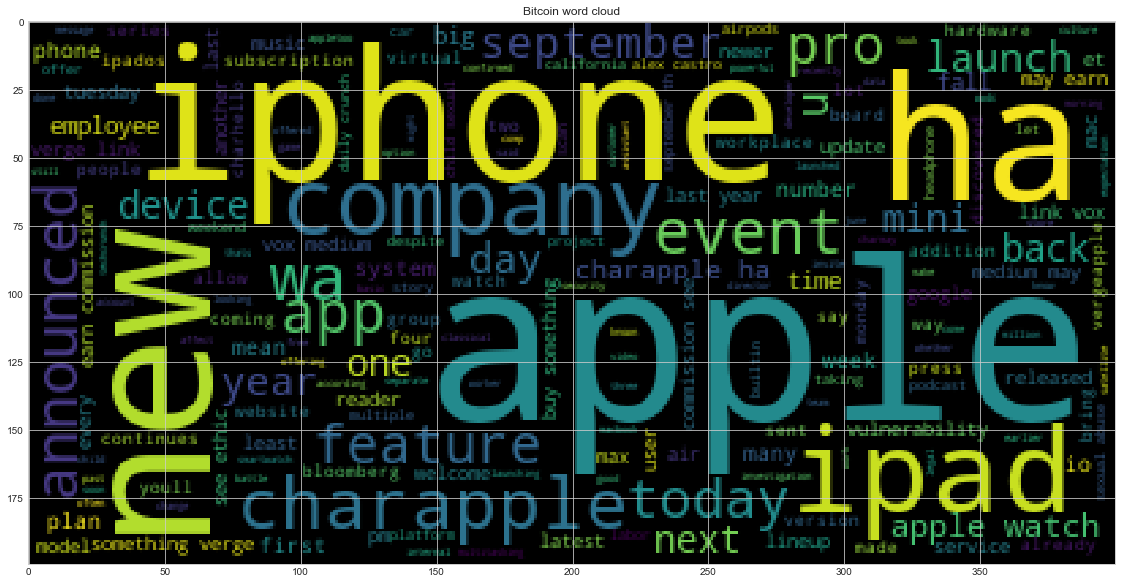

In [94]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(processed3)
plt.imshow(wc)
plt.title('Bitcoin word cloud')

Text(0.5, 1.0, 'Ethereum word cloud')

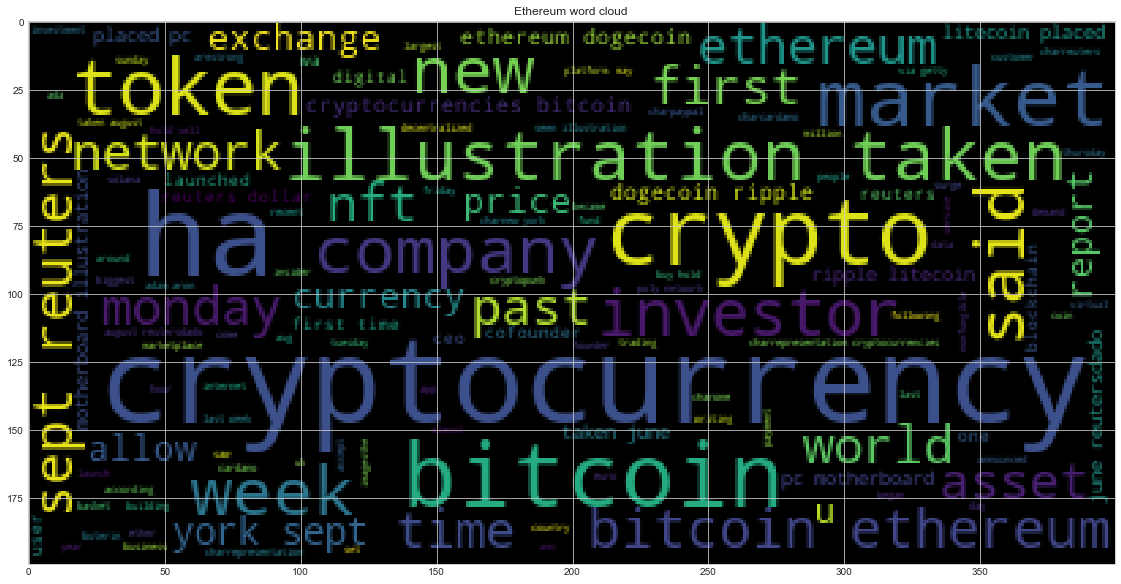

In [95]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(processed2)
plt.imshow(wc)
plt.title('Ethereum word cloud')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [89]:
import spacy
from spacy import displacy

In [90]:
# Download the language model for SpaCy
nlp = spacy.load("en_core_web_sm")

In [91]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [96]:
# Concatenate all of the Bitcoin text together
bitcoin_text = []
for i in range (0,100):
    try:
        doc=bitcoin_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            bitcoin_text.append(doc)
            
    except AttributeError:
        pass
    
bitcoin_text= ', '.join(bitcoin_text)
regex = re.compile("[^a-zA-Z ]")
re_clean = regex.sub('', bitcoin_text)

In [97]:
# Run the NER processor on all of the text
NER_bit = nlp(re_clean)
NER_bit.user_data["title"] = "Bitcoin"
# Add a title to the document
# YOUR CODE HERE!

In [98]:
# Render the visualization
displacy.render(NER_bit, style='ent')

In [99]:
# List all Entities
print([ent.text for ent in NER_bit.ents])

['September', 'iPhones', 'Today', 'the past year and a half', 'Apple', 'Cupertin', 'a few years', 'US', 'Verizon Engadgets', 'Disney Ap', 'Apple Music', 'Verge', 'Vox Media', 'Alex Castro', 'Apple Watch', 'todays', 'Apple iPhone', 'Apple Watch', 'Apple', 'every two years or so iPadOS', 'iPad', 'App', 'Apple', 'Amazon Alexa', 'three', 'Apple', 'Apple', 'ninth', 'first', 'Chaim Gartenberg', 'Apple', 'September', 'WWDC', 'June', 'Apple HQ', 'iPads', 'Apple Watch As', 'Lego Star Wars', 'next spring', 'Apple Arcade', 'Lego Star Wars Battles', 'Lumen', 'the Apple Watch', 'Monday', 'AppleToo', 'Apple', 'Apple', 'US', 'Bloomberg', 'weekTMobile', 'at least  million', 'Apple', 'today', 'May', 'Melissa Polinsky', 'two hours', 'iPhone', 'the past few days', 'Preorders', 'four', 'iPhones', 'Android', 'Apple Watch', 'Apple', 'Apple', 'AppleApples', 'Tuesday September', 'PM ET', 'Alex Castro', 'this morning', 'AppleToo', 'app', 'thirdparty', 'Apple', 'Japanese', 'today', 'Apple', 'Apple', 'iPhone iPa

---

### Ethereum NER

In [100]:
# Concatenate all of the Ethereum text together
ethereum_text = []
for i in range (0,100):
    try:
        doc=ethereum_headlines["articles"][i]
        doc=doc['content']
        if pd.isna(doc):
            print('Empty') 
        else:        
            ethereum_text.append(doc)
            
    except AttributeError:
        pass
    
ethereum_text= ', '.join(ethereum_text)
regex = re.compile("[^a-zA-Z ]")
re_clean_eth = regex.sub('', ethereum_text)

In [101]:
# Run the NER processor on all of the text
NER_ethe = nlp(re_clean_eth)
NER_ethe.user_data["title"] = "Ethereum"

In [102]:
# Render the visualization
displacy.render(NER_ethe, style='ent')

In [103]:
# List all Entities
print([ent.text for ent in NER_ethe.ents])

['Bitcoin', 'AMC', 'Adam Aron', 'Ethereum Litecoin', 'PayPal', 'US', 'first', 'today', 'UK', 'OpenSea', 'Nate Chasta', 'PayPal', 'a year', 'US', 'Monday', 'Mr White Hat', 'Vitalik ButerinVitalik Buterin', 'Getty ImagesJohn PhillipsVitalik Buterin', 'eight', 'JRR Tolkiens', 'Cardano adaSOPA imagesThe cardano network', 'this past weekend', 'Sen Elizabeth', 'Getty ImagesSen', 'Elizabeth Warren', 'Justin SullivanGetty ImagesCitigroup', 'CoinDesk reportThe', 'two', 'one', 'LONDON', 'Reuters', 'September', 'Bitcoin', 'August', 'REUTERSDado RuvicIllustrationFile', 'Reuters', 'AMC Entertainment', 'Adam Aron', 'Solanas', 'first', 'Monday', 'August', 'UKits', 'first', 'Vitalik Buterin', 'John PhillipsGetty Images for TechCrunchEthereum', 'Vitalik Buterin', 'Time', 'the past decade', 'Bitcoin', 'Russell', 'Playbyte', 'Dom Hofmann', 'Alexi RosenfeldGetty ImagesCrypto', 'NFT', 'This Tuesday', 'Solana SOL', 'seventh', 'Dogecoin', 'Reuters', 'YORK', 'Reuters', 'Friday', 'first', 'May', 'bitcoin', 'Ch

---